# Upsilon results

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Plotting fiducial matter-power spectrum

In [121]:
#read files

#%cat 'data/test_Pk_camb.dat'
Pk_camb   = pd.read_csv('data/test_Pk_camb.dat',   names=['k', 'Pk_camb'], index_col=['k'], sep='\s+')
Pk_coyote = pd.read_csv('data/test_Pk_coyote.dat', names=['k', 'Pklin', 'Pk_coyote'], index_col=['k'], sep='\s+')
Pk_Suk    = pd.read_csv('data/test_Pk_Suk27.dat',  names=['k', 'Pk_Sukhdeep'], index_col=['k'], sep='\s+')
Pk_camb.head()

,Pk_camb
k,
0.000100,348.83
0.000102,355.59
0.000104,362.48
0.000106,369.51
0.000108,376.67


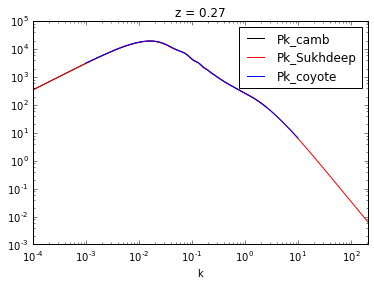

In [76]:
#plot files

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
Pk_camb.plot(ax= ax, style='k')
Pk_Suk['Pk_Sukhdeep'].plot(ax =ax, style ='r-')
Pk_coyote['Pk_coyote'].plot(ax =ax, style ='b-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('z = 0.27')
plt.legend(loc= 'best')

## Correlation function

In [162]:
#read files

#%cat 'data/best_mock_bigMD_RST_singlesnap_rebin1_DM1_r010.dat'
Xi_gg_Suk = pd.read_csv('data/test_gg_Sukh27.dat', names = ['r', 'wgg', 'ups'], 
                        skiprows=[0], index_col=['r'], sep='\s+')
Xi_gm_Suk = pd.read_csv('data/test_gm_Sukh27.dat', names = ['r', 'wgm', 'ups'], 
                        skiprows=[0], index_col=['r'], sep='\s+')
Xi_FFT = pd.read_csv('data/best_mock_bigMD_RST_singlesnap_rebin1_DM1_r010.dat', 
                     names =['r', 'xi_obs', 'xi_err', 'xi_th'], sep ='\s+')

In [163]:
# for best_fit, split files to gg and gm

Xi_fft_gg, Xi_fft_gm = np.array_split(Xi_FFT, 2)

In [164]:
# set the new index to 'r'

Xi_fft_gg.index = Xi_fft_gg['r']
Xi_fft_gm.index = Xi_fft_gm['r']
Xi_fft_gm.head()

,r,xi_obs,xi_err,xi_th
r,,,,
13.2398,13.2398,2.805348,0.124579,2.675298
15.2398,15.2398,3.449673,0.151162,3.355147
17.2398,17.2398,3.927402,0.148694,3.699784
19.2398,19.2398,4.083967,0.148257,3.862316
22.2398,22.2398,4.078806,0.136748,3.917508


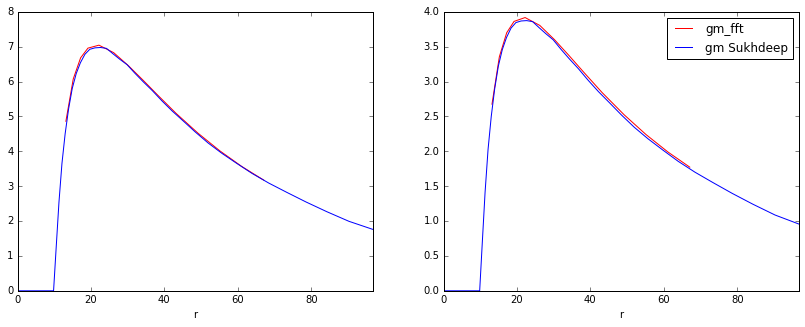

In [180]:
# plot

fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
Xi_fft_gg['xi_th'].plot(ax= ax, color='r', linestyle='-', label = 'gg_fft')
#Xi_fft_gg['xi_obs'].plot(ax= ax, fmt='o', yerr=Xi_fft_gg['xi_err'])  # observs not useful now
Xi_gg_Suk['ups'].plot(ax= ax, label = 'gg Sukhdeep')

ax2 = plt.subplot(1, 2, 2)
Xi_fft_gm['xi_th'].plot(ax= ax2, color='r', linestyle='-', label='gm_fft')
#Xi_fft_gm['xi_obs'].plot(ax= ax2, fmt='o', yerr=Xi_fft_gm['xi_err'])
Xi_gm_Suk['ups'].plot(ax= ax2, label='gm Sukhdeep')

plt.legend(loc ='best')

# Plotting for different b2 values

In [211]:

def read_files(num, R0=4):
    Xi_FFT = pd.read_csv('data/best_mock_bigMD_RST_singlesnap_rebin1_DM1_r0{}_0{}.dat'.format(R0, num), 
                     names =['r', 'xi_obs', 'xi_err', 'xi_th'], sep ='\s+')
    Xi_fft_gg, Xi_fft_gm = np.array_split(Xi_FFT, 2)
    Xi_fft_gg.index = Xi_fft_gg['r']
    Xi_fft_gm.index = Xi_fft_gm['r']
    return Xi_fft_gg, Xi_fft_gm

In [273]:
def plot_files(b2, ax, ax2, R0=4):
    g = read_files(b2, R0=4)
    names = ['-0.2','0.0','0.2','0.4']
    b2_dic= dict(enumerate(names))
    g[0]['xi_th'].plot(ax= ax,  linestyle='-')
    g[1]['xi_th'].plot(ax= ax2,  linestyle='-', label = 'b2 ={}'.format(b2_dic[b2]))

In [274]:
def plot_style(ax, ax2, R0=4):
    ax.set_ylabel('gg')
    ax2.set_ylabel('gm')
    ax2.set_title('singlesnap, R0 = {}'.format(R0), fontsize='20')

In [275]:
def full_plot(R0):
    fig = plt.figure(figsize=(14, 5))
    ax = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    g= read_files(0, R0)
    g[0]['xi_obs'].plot(ax=ax, yerr=g[0]['xi_err'], fmt='o')
    g[1]['xi_obs'].plot(ax=ax2, yerr=g[1]['xi_err'], fmt='o')

    for i in np.arange(4):
        plot_files(i, ax, ax2, R0=R0)

    plot_style(ax, ax2, R0=R0)
    plt.legend(loc='best')

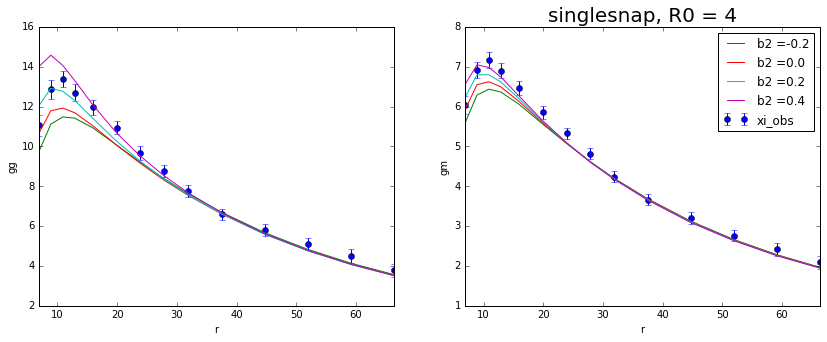

In [277]:
full_plot(R0= 4)

In [4]:
def read_csv_file(file, col1, col2):
    col_1 , col_2 = [], []
    with open(file, 'rb') as f:
        reader = csv.reader (f, delimiter='\n')
        for row in reader:
            print row
            col_1.append(row[col1])
            col_2.append(row[col2])
        return col_1, col_2    

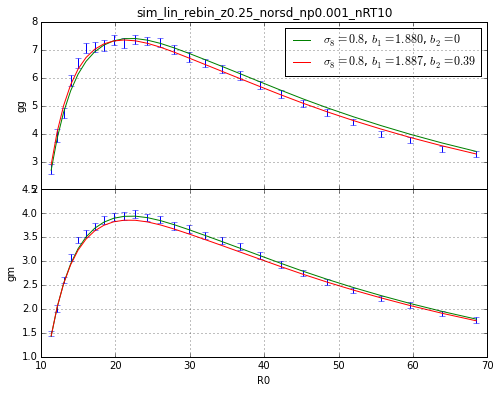

In [109]:
best_file = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_gg.dat'
best_file_2 = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_2_gg.dat'
best = np.loadtxt(best_file, unpack=True)
best_2 = np.loadtxt(best_file_2, unpack=True)

best2_file = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_gm.dat'
best2_file_2 = 'best_sim_lin_rebin_z0.25_norsd_np0.001_nRT10_r010_jk0_2_gm.dat'
best2 = np.loadtxt(best2_file, unpack=True)
best2_2 = np.loadtxt(best2_file_2, unpack=True)


f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,6))


ax1.errorbar(best[0], best[1], yerr=best[2], linestyle="None")
ax1.plot(best[0],best[3], label=('$\sigma_8=0.8$, $b_1 =1.880$, $b_2=0$'))
ax1.plot(best[0],best_2[3], label=('$\sigma_8=0.8$, $b_1 =1.887$, $b_2=0.39$'))
f.subplots_adjust(hspace=0)
ax1.set_title('sim_lin_rebin_z0.25_norsd_np0.001_nRT10')
ax1.set_ylabel('gg')
ax1.legend(loc="upper right")
ax1.grid(True)


ax2.errorbar(best2[0], best2[1], yerr=best2[2], linestyle="None")
ax2.plot(best2[0],best2[3])
ax2.plot(best2[0],best2_2[3])
ax2.set_ylabel('gm')
ax2.grid(True)

plt.xlabel('R0')
plt.show()



In [9]:
file_read = '/Users/josevazquezgonzalez/Desktop/Ups/Upsilon/Results/Useful/jk_sim.dat'


/Users/josevazquezgonzalez/Desktop/Ups/Upsilon/Results


In [11]:
file1 = np.loadtxt(file_read, unpack=True)


(1, 11)

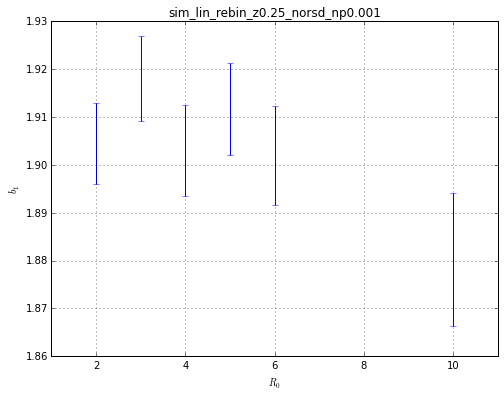

In [25]:
f, ax1 = plt.subplots(1,1, figsize=(8,6))


ax1.errorbar(file1[0], file1[3], yerr=file1[4]*10, linestyle="None")
plt.grid(True)
plt.ylabel('$b_1$')
plt.xlabel('$R_0$')
plt.title('sim_lin_rebin_z0.25_norsd_np0.001')
plt.xlim([1,11])